# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Feb 6, 11 PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Alexander Cheng

Student ID: 1001634298

Roughly 12 minutes to run the entire code

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [869]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.5]**
* How many features do we have in this dataset? 30
* What are the target classes? 1 and 0's
* What do these target classes signify?  Malignant or Benign
* How many participants tested `Malignant`? 212 Participants
* How many participants tested `Benign`? 357 Participants

In [870]:
### Change data to Pandas Dataframe (Easier to work with)
import pandas as pd
import numpy as np

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
x = df.copy(deep=True)

In [871]:
print(dataset.keys())
print (df) # 30 Features
print(dataset.DESCR)
print(dataset.feature_names)
print(dataset.target) #Target classes are 1 and 0s
print(dataset.target_names) #Target classes signify whether Malignant or Benign

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  

In [872]:
#Adding target to df and calculating malignant and benign samples
df['target'] = pd.Series(dataset.target)
target_data = dataset.target
target_names = dataset.target_names
print("Target data content:", np.unique(target_data) ) ### Use np.unique ###
print("Target data type:",type(target_data[0]))

print("Target names content:",target_names)
print("Target names type:",type(target_names[0]))

#Create a mask
malignant_samples= np.sum(target_data ==0)
benign_samples= np.sum(target_data ==1)
print("%d samples of type malignant" % malignant_samples )
print("%d samples of type benign" % benign_samples )

Target data content: [0 1]
Target data type: <class 'numpy.int64'>
Target names content: ['malignant' 'benign']
Target names type: <class 'numpy.str_'>
212 samples of type malignant
357 samples of type benign


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is ``mean compactness``, the y-axis is ``mean concavity,`` and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.5]**




**Advantages of Standardization:**
After standardization, the graphs looks the same, however the scale changed.
Based on my observation, Standardization allows an equal weighting when looking at the closest neighbors based on distance. Since not all scales are the same, those with larger or smaller numbers are weighted differently when measuring the'k closest neighbors'. Standard deviation allows them to be weighted evenly.

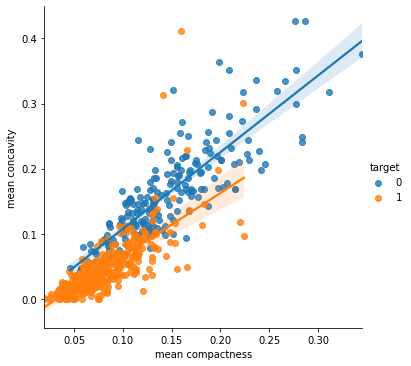

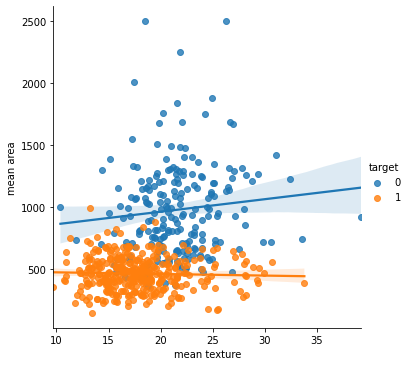

In [873]:
### Import Seaborl.lmplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = 'mean compactness', y ='mean concavity', data=df, hue='target')
sns.lmplot(x = 'mean texture', y ='mean area', data=df, hue='target')
  
# Show the plot 
plt.show() 

In [874]:
#Standardize Data
mu,si = df.mean(), df.std() #Calculate the overall mean and standard deviation of the quality scores
df_standard = df - mu #Subtract the mean from every entry
df_standard = df_standard / si #Divide every entry by the standard deviation
#Confirm if the data has been normalized
df_standard

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,-1.296535
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,-1.296535
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,-1.296535
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,-1.296535
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,-1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,2.377491,2.601897,1.085429,0.191637,0.665416,2.065360,-1.137415,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,-1.296535
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,1.155840,1.290429,-0.423637,-0.069697,0.251980,0.807720,-0.188995,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,-1.296535
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,0.276450,0.180539,-0.379008,0.660696,0.510377,0.611619,-0.890632,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,-1.296535
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,1.437265,1.008615,-0.172848,2.015943,1.301140,0.785031,0.326346,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,-1.296535


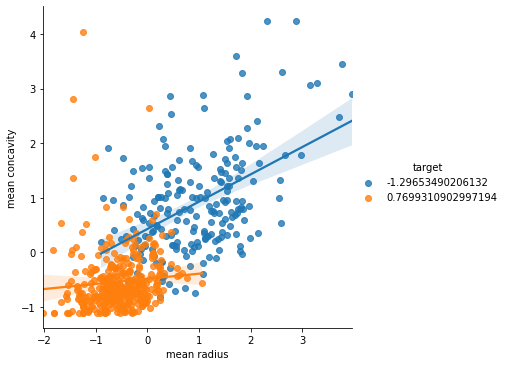

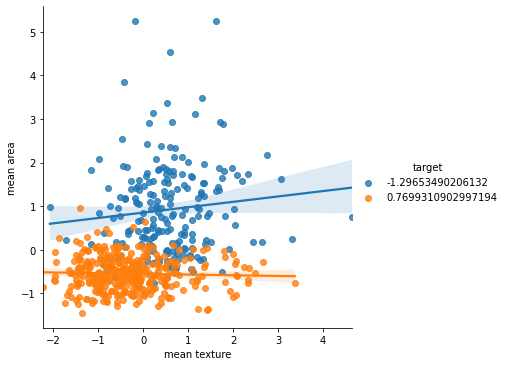

In [875]:
#Plot Mean radius vs Mean concavity
sns.lmplot(x = 'mean radius', y ='mean concavity', data=df_standard, hue='target')
sns.lmplot(x = 'mean texture', y ='mean area', data=df_standard, hue='target')
  
# Show the plot 
plt.show() 

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [876]:
### Splitting the data (Creating a copy since it will be used multiple times)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target_data, test_size=0.3, random_state=0)
#Will be used in part 4 and 5
X_Stdtrain = X_train.copy (deep=True)
X_Stdtest = X_test.copy (deep=True)
X_stdtrain2 = X_train.copy (deep=True)

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which `k`s lead to underfitted or overfitted models (you might need to add extra plots to investidgate that!). **[0.5]**




In [877]:
### Train KNN Classifier with 5 neighbors using Cross Validation (Example)
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

# Measuring how accurate knn.predict is 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, knn.predict(X_train))
print ("Accuracy: ", accuracy * 100, "%")

#Measuring how accurate cross-validation accuracy is
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-Validation Accuracy: %0.4f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy:  93.96984924623115 %
Cross-Validation Accuracy: 0.9196 (+/- 0.037)


For 1.00 nearest neighbors, Accuracy: 100.00 
Cross-Validation Accuracy: 0.9171 (+/- 0.0372)
For 2.00 nearest neighbors, Accuracy: 96.23 
Cross-Validation Accuracy: 0.9171 (+/- 0.0255)
For 3.00 nearest neighbors, Accuracy: 95.23 
Cross-Validation Accuracy: 0.9272 (+/- 0.0285)
For 4.00 nearest neighbors, Accuracy: 94.72 
Cross-Validation Accuracy: 0.9271 (+/- 0.0189)
For 5.00 nearest neighbors, Accuracy: 93.97 
Cross-Validation Accuracy: 0.9196 (+/- 0.0373)
For 6.00 nearest neighbors, Accuracy: 93.22 
Cross-Validation Accuracy: 0.9247 (+/- 0.0353)
For 7.00 nearest neighbors, Accuracy: 93.72 
Cross-Validation Accuracy: 0.9322 (+/- 0.0408)
For 8.00 nearest neighbors, Accuracy: 93.72 
Cross-Validation Accuracy: 0.9322 (+/- 0.0408)
For 9.00 nearest neighbors, Accuracy: 93.22 
Cross-Validation Accuracy: 0.9246 (+/- 0.0572)
For 10.00 nearest neighbors, Accuracy: 93.22 
Cross-Validation Accuracy: 0.9347 (+/- 0.0371)
For 11.00 nearest neighbors, Accuracy: 93.47 
Cross-Validation Accuracy: 0.934

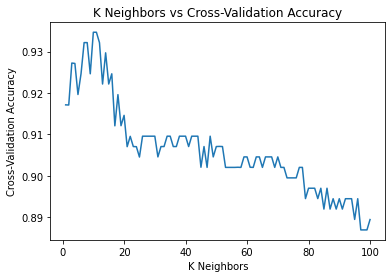

In [878]:
### Train KNN Classifier using cross-validation on dataset
### Plotting KNN from 1 to 100 neighbors
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

acc = np.zeros(100)
crossvalacc = np.zeros(100)
Kcount = np.zeros(100)

#Loops/tries k from 1 to 100
for i in range(1, 101):
  Kcount[i-1] = i
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  accuracy = accuracy_score(y_train, knn.predict(X_train))
  print ("For %0.2f nearest neighbors, Accuracy: %0.2f " % (i, accuracy * 100))
  acc[i-1] = accuracy

  scores = cross_val_score(knn, X_train, y_train, cv=5)
  print("Cross-Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
  crossvalacc[i-1] = scores.mean()

plt.plot(Kcount, crossvalacc)
plt.xlabel('K Neighbors')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K Neighbors vs Cross-Validation Accuracy')
plt.show()

In [879]:
print(np.argmax(crossvalacc) + 1) # k=10 (10 nearest neighbors) gives the highest cross validation accuracy
print(np.amax(crossvalacc)) #Highest Cross-Validation Accuracy is 93.46%

10
0.9346518987341772


k=10 (10 nearest neighbors) gives the highest cross validation accuracy

Highest Cross-Validation Accuracy is 93.46%

In [880]:
# ### Plotting KNN from 1 to 100 neighbors using test data to show underfitting and overfitting
# from sklearn import neighbors
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

# testacc = np.zeros(100)
# Kcount = np.zeros(100)

# for i in range(1, 101):
#   Kcount[i-1] = i
#   knntest = neighbors.KNeighborsClassifier(n_neighbors=i)
#   knntest.fit(X_train,y_train)

#   accuracy = accuracy_score(y_test, knntest.predict(X_test))
#   print ("For %0.2f nearest neighbors, Accuracy: %0.2f " % (i, accuracy * 100))
#   testacc[i-1] = accuracy

# plt.plot(Kcount, crossvalacc, label = 'Training Data')
# plt.plot(Kcount, testacc, label = 'Test Data')
# plt.xlabel('K Neighbors')
# plt.ylabel('Cross-Validation Accuracy')
# plt.title('Test Data vs Training Data')
# plt.legend()
# plt.show()

For 1.00 nearest neighbors, Accuracy: 100.00 
Cross-Validation Accuracy: Test Score is 0.9171, Training Score is 1.0000)
For 2.00 nearest neighbors, Accuracy: 96.23 
Cross-Validation Accuracy: Test Score is 0.9171, Training Score is 0.9629)
For 3.00 nearest neighbors, Accuracy: 95.23 
Cross-Validation Accuracy: Test Score is 0.9272, Training Score is 0.9504)
For 4.00 nearest neighbors, Accuracy: 94.72 
Cross-Validation Accuracy: Test Score is 0.9271, Training Score is 0.9435)
For 5.00 nearest neighbors, Accuracy: 93.97 
Cross-Validation Accuracy: Test Score is 0.9196, Training Score is 0.9372)
For 6.00 nearest neighbors, Accuracy: 93.22 
Cross-Validation Accuracy: Test Score is 0.9247, Training Score is 0.9378)
For 7.00 nearest neighbors, Accuracy: 93.72 
Cross-Validation Accuracy: Test Score is 0.9322, Training Score is 0.9366)
For 8.00 nearest neighbors, Accuracy: 93.72 
Cross-Validation Accuracy: Test Score is 0.9322, Training Score is 0.9366)
For 9.00 nearest neighbors, Accuracy: 9

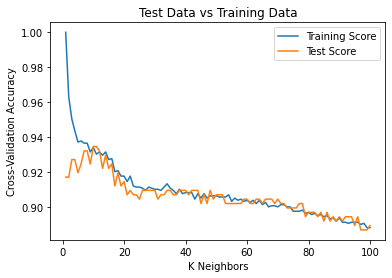

In [881]:
### Plotting KNN from 1 to 100 neighbors using cross_validate data to show underfitting and overfitting

from sklearn.model_selection import cross_validate
from statistics import mean 
import numpy as np

acc = np.zeros(100)
Testscore = np.zeros(100)
Trainingscore = np.zeros(100)
Kcount = np.zeros(100)

for i in range(1, 101):
  Kcount[i-1] = i
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  accuracy = accuracy_score(y_train, knn.predict(X_train))
  print ("For %0.2f nearest neighbors, Accuracy: %0.2f " % (i, accuracy * 100))

  #Using the Cross Validate function to examine underfitting and overfitting
  scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  
  data = list(scores.items())
  scoresarray = np.asarray(data, dtype=object)
  Testscore[i-1] = scoresarray[2,1].mean()
  Trainingscore[i-1] = scoresarray[3,1].mean()

  print("Cross-Validation Accuracy: Test Score is %0.4f, Training Score is %0.4f)" % (Testscore[i-1], Trainingscore[i-1]))

plt.plot(Kcount, Trainingscore, label = 'Training Score')
plt.plot(Kcount, Testscore, label = 'Test Score')
plt.xlabel('K Neighbors')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Test Data vs Training Data')
plt.legend()
plt.show()

**Overfitting & Underfitting**
Small numbers of K lead to overfitting (K < 7) - Training score is very high and low test score - samples is trained by the training data, test data will be different so it will blindly follow the training model. 
Large numbers of k leads to underfitting (K > 7) - Training and Test score starts to decrease (Higher error for both) - with so many samples into consideration, it will include wrong samples into training. 

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days! instead, we propose an algorithm that can examine each feature's effect with much fewer cases ($F(F+1)/2$). 

design a function that: **[3]**
  1.  Starts training a KNN model on all features, sweeps the ``k`` (besides 1 to 100, you can use any reasonable/smaller window size you like), and find the highest cross-validation accuracy (similar to part 2). 
  2.  In a for loop, we remove one feature at a time. For example, if we have 10 features overall (f0, f1 ... f9), first we only remove f0, train the model with those 9 remaining features (f1,f2,..f9) and compute the cross-validation accuracy (while sweeping k, of course) and store the best cross-validation score in an element of an array-like `Scores[0]`.
  3.  We are going to remove only f1 from the original features and train the model on the remaining 9 features (f0,f2,..f9), find the best cross-validation score, and store it in the ``Scores[1]``. we repeat until we tried all the features once (we filled ``Scores[9]``). 

  4.  Now, we take a look at the ``Scores`` array. We are looking to find out removing which feature hurts accuracy the least. For example, if ``Scores[2]`` is the maximum value of the ``Scores`` array, it shows removing ``f2`` had the least effect on our accuracy (i.e., f2 was not providing useful information for our model).

  5.  Therefore, we permanently remove that feature (f2) and start the loop again. Now we have 9 features (f0,f1,f3...f9) and will try to remove another one. The process is the same, go back to step 2 and try removing another feature. 

  6. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if ``threshold=0.95`` we do not continue removing features if our cross-validation accuracy is bellow ``0.95 * Full Feature cross-validation accuracy (step 1)`` .

  7. Your function will return 2 arrays, a list of removed features, and the corresponding cross-validation accuracy when that feature was removed. 



```
Feature_selector (training_data, threshold)
>>>returns: Removed_features_list , Cross_validartion_accuracy
```


* Run your function on the original training data with a threshold of 0.95\%. **[1]**
  * Plot the Cross-validation accuracy (Y-Axis) vs. the Number of features. 

In [882]:
# Function returns the index for the feature that was dropped that provided us the largest cross validation accuracy and the accuracy value
# This means that the feature has the smallest impact on distinguishing the target classes
# From the previous graph, we could observe that as we past around k=20, it tends to underfit
# Will limit the k to 20 to improve run time

def Feature_selector (training_data, Maxcutoff) :

  #Initializing an array that records the best cross validation accuracy as each corresponding feature drop
  bestcrossvalacc = np.zeros(len(training_data.columns))

  #Used to determine which K is the best for each feature dropped
  bestk = []

  #Will loop through every feature and drop it to compare Cross Validation Accuracy
  for features in range(0, len(training_data.columns)):
    #acc = np.zeros(20)
    crossvalacc = np.zeros(20)
    #This restores the dropped column 
    x = training_data.copy(deep = True)
    x.drop(x.columns[features], axis = 1, inplace=True)

    #Loops through k neighbors 
    for i in range(1, 21):
      knn = neighbors.KNeighborsClassifier(n_neighbors=i)
      knn.fit(x,y_train)

      #accuracy = accuracy_score(y_train, knn.predict(x))
      #print ("For %0.2f nearest neighbors, Accuracy: %0.2f " % (i, accuracy * 100))
      #acc[i-1] = accuracy

      scores = cross_val_score(knn, x, y_train, cv=5)
      #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
      crossvalacc[i-1] = scores.mean()

    #print ("For Feature %0.2f, max score at %0.2f nearest neighbors, Accuracy: %0.2f " % (features + 1, np.argmax(crossvalacc), np.amax(crossvalacc) * 100))

    #Keeps the highest accuracy of k from 1-20 for dropping that feature
    bestcrossvalacc[features] = np.amax(crossvalacc)
    bestk.append(np.argmax(crossvalacc))

    #Will stop loop if it finds the max accuracy after dropping a column - it looks like when normalizing, removing columns may help improve accuracy
    #This will improve time, but this changes the order of removal which is not intended
    # if bestcrossvalacc[features] >= Maxcutoff:
    #   break

  #Returns index and accuracy of all the features dropped
  print("Optimal number of neighbors at %0.2f" % (bestk[np.argmax(bestcrossvalacc)] + 1))
  Removed_features_list = np.argmax(bestcrossvalacc)
  Cross_validation_accuracy = np.amax(bestcrossvalacc)

  #Returns index of feature that provided the best cross validation accuracy, along with the best cross validation accuracy
  return Removed_features_list, Cross_validation_accuracy

In [883]:
#Outputs the Cross-Validation Accuracy with all of the features (Will be used as a cutoff limit when removing features)
def threshold_finder (training_data) :

  #acc = np.zeros(20)
  crossvalacc = np.zeros(20)
  x = training_data.copy(deep = True)

  #Finds the best k neighbors
  for i in range(1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y_train)

    #accuracy = accuracy_score(y_train, knn.predict(x))
    #print ("For %0.2f nearest neighbors, Accuracy: %0.2f " % (i, accuracy * 100))
    #acc[i-1] = accuracy

    scores = cross_val_score(knn, x, y_train, cv=5)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    crossvalacc[i-1] = scores.mean()

  Cross_validation_accuracy = np.amax(crossvalacc)

  return Cross_validation_accuracy

In [884]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Get a chained assignment warning because I'm working on the copy of the dataframe
pd.options.mode.chained_assignment = None

#The accuracy when all of the features are there
Maxcutoff = threshold_finder(X_train)
threshold = Maxcutoff*1

#Number of features dropped
loops = 0
#List of highest accuracy (of k neighbors) when feature is removed
Cross_Val_Removed = []
NumberofFeatures = []

#Adds the cross validation accuracy when all of the features are still there
Cross_Val_Removed.append(Maxcutoff)
NumberofFeatures.append(loops)

#Used a while loop instead of putting all 3 functions inside the feature selector to help visualize easier
#Condition 1 and 2 - Stop when accuracy is less than threshold of 95% or if there's only 1 feature left
while threshold >= 0.95*Maxcutoff and len(X_train.columns) >= 2:
  FeatureDrop, Cross_validation_accuracy = Feature_selector(X_train, Maxcutoff)
  threshold = Cross_validation_accuracy

#Index number placed to visualize how where in each loop is the maximum - can use break function in the feature selector to drastically reduce the time calculating
  print ("For dropping Feature %s, index %0.1f, Cross Validation Accuracy: %0.4f " % (X_train.columns[FeatureDrop], FeatureDrop, threshold))
  loops = loops +1
  #Permanently drops a feature that affects the accuracy the least
  X_train.drop(X_train.columns[FeatureDrop], axis = 1, inplace=True)

  NumberofFeatures.append(loops)
  Cross_Val_Removed.append(threshold)
#To visualize which features are left remaining
print(X_train)

Optimal number of neighbors at 10.00
For dropping Feature mean radius, index 0.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean texture, index 0.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean smoothness, index 2.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean compactness, index 2.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean concavity, index 2.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean concave points, index 2.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean symmetry, index 2.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at 10.00
For dropping Feature mean fractal dimension, index 2.0, Cross Validation Accuracy: 0.9347 
Optimal number of neighbors at

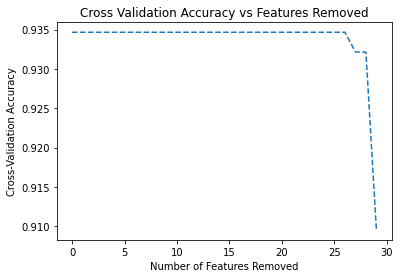

In [885]:
#Plot the Cross-validation accuracy (Y-Axis) vs. the Number of features.

plt.plot(NumberofFeatures, Cross_Val_Removed, '--')
plt.xlabel('Number of Features Removed')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross Validation Accuracy vs Features Removed')
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have standardized and original trainig data vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [886]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
pd.options.mode.chained_assignment = None

### Standardize the training and test data
mu,si = X_Stdtrain.mean(), X_Stdtrain.std() #Calculate the overall mean and standard deviation of the training data
X_Stdtrain -= mu #Subtract the training data mean from every entry
X_Stdtrain /= si #Divide every entry by the training data standard deviation

X_Stdtest -= mu #Subtract the training data mean from every entry
X_Stdtest /= si #Divide every entry by the training data standard deviation


#Calling the feature selector with the standardized data and a threshold of 95%
#The accuracy when all of the features are there
Maxcutoff = threshold_finder(X_Stdtrain)
threshold = Maxcutoff*1
#Number of features dropped
loops = 0
#List of highest accuracy (of k neighbors) when feature is removed
StdCross_Val_Removed = []
StdNumberofFeatures = []

#Used in part 5 to easily remove the features for a optimized model
Indexdrop = []

#Adds the cross validation accuracy when all of the features are still there
StdCross_Val_Removed.append(Maxcutoff)
StdNumberofFeatures.append(loops)

#Used a while loop instead of putting all 3 functions inside the feature selector to help visualize easier
#Condition 1 and 2 - Stop when accuracy is less than threshold of 95% or if there's only 1 feature left
while threshold >= 0.95*threshold and len(X_Stdtrain.columns) >= 2:
  FeatureDrop, Cross_validation_accuracy = Feature_selector(X_Stdtrain, Maxcutoff)
  threshold = Cross_validation_accuracy

  #WIll be used in part 5 to easily remove the features for a optimized model
  Indexdrop.append(FeatureDrop)

  #Index number placed to visualize how where in each loop is the maximum - can use break function in the feature selector to drastically reduce the time calculating
  print ("For dropping Feature %s, index %0.1f, Cross Validation Accuracy: %0.4f " % (X_Stdtrain.columns[FeatureDrop], FeatureDrop, threshold))
  loops = loops +1
  #Permanently drops a feature that affects the accuracy the least
  X_Stdtrain.drop(X_Stdtrain.columns[FeatureDrop], axis = 1, inplace=True)
  StdNumberofFeatures.append(loops)
  StdCross_Val_Removed.append(threshold)
  
#To visualize which features are left remaining
print(X_Stdtrain)


Optimal number of neighbors at 8.00
For dropping Feature mean symmetry, index 8.0, Cross Validation Accuracy: 0.9700 
Optimal number of neighbors at 9.00
For dropping Feature perimeter error, index 11.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 11.00
For dropping Feature compactness error, index 13.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 11.00
For dropping Feature mean compactness, index 5.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 11.00
For dropping Feature area error, index 10.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 14.00
For dropping Feature worst compactness, index 20.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 18.00
For dropping Feature mean concavity, index 5.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 12.00
For dropping Feature mean radius, index 0.0, Cross Validation Accuracy: 0.9725 
Optimal number of neighbors at 12.00


In [887]:
# Using standard scaler (if required) - would be placed under ## Standardize the training and test data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_Stdtrain = sc.fit_transform(X_Stdtrain)
# X_Stdtest = sc.transform(X_Stdtest)
# X_Stdtrain = pd.DataFrame(X_Stdtrain, columns = dataset.feature_names)
# X_Stdtest = pd.DataFrame(X_Stdtest, columns = dataset.feature_names)
# print(X_Stdtrain)
# print(X_Stdtest)

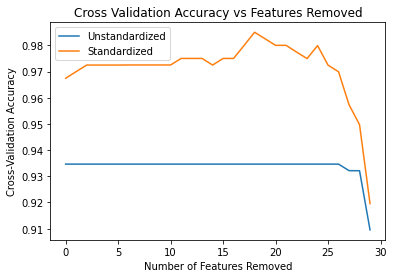

In [888]:
plt.plot(NumberofFeatures, Cross_Val_Removed, label = "Unstandardized")
plt.plot(StdNumberofFeatures, StdCross_Val_Removed, label = "Standardized")
plt.xlabel('Number of Features Removed')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross Validation Accuracy vs Features Removed')
plt.legend()
plt.show()


*   Standardization helped the model and its performance by scaling all the 
parameters.
*   Since not all scales are the same, those with larger or smaller numbers are weighted differently when measuring the'k closest neighbors'
*   Standardization led to a higher cross validation accuracy at every number of features removed. (model predicts the correct target more often)
*   Highest cross validation accuracy occured after dropping 18 features (12 Features remaining) - 98.5% Cross validation Accuracy
Best K at 13 nearest neighbors
*   Features remaining: 'mean texture', 'mean perimeter', 'mean smoothness', 'radius error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points'
*   Index dropped in order: 8, 11, 13, 5, 10, 20, 5, 0, 2, 19, 3, 11, 14, 9, 3, 5, 4, 12 - Used in part 5 to recreate optimized model with test data

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [889]:
### Dropping features to match test data with training data
# Have to normalize data again using X_stdtrain2, function in part 4 dropped all but 1 column in X_Stdtrain, X_train is also changed

mu,si = X_stdtrain2.mean(), X_stdtrain2.std() 
X_stdtrain2 -= mu 
X_stdtrain2 /= si 

X_test -= mu 
X_test /= si 

#Feature dropped from test and training data for optimized model
FeatureIndexDrop = [8, 11, 13, 5, 10, 20, 5, 0, 2, 19, 3, 11, 14, 9, 3, 5, 4, 12]
for i in range(0, len(FeatureIndexDrop)):
  X_test.drop(X_test.columns[FeatureIndexDrop[i]], axis = 1, inplace=True)
  X_stdtrain2.drop(X_stdtrain2.columns[FeatureIndexDrop[i]], axis = 1, inplace=True)
print(X_test)

#Best cross validation accuracy for the training data at k=13
knn = neighbors.KNeighborsClassifier(n_neighbors=13)

knn.fit(X_stdtrain2, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print ("Test set accuracy: ", accuracy * 100, "%")

#Test data had a accuracy of 97.07%, which is a bit lower than our best model of 98.5% but that is expected with test data since the model is trained to the testing data
#Normalizing the data, removing some features, and choosing the optimal k helped provide a model that has a very accurate prediction
#Roughly 12 minutes to run the entire code

     mean texture  mean perimeter  ...  worst concavity  worst concave points
512      0.316709       -0.149197  ...         1.252625              1.368262
457      1.445459       -0.332488  ...        -0.670278             -0.839899
439     -0.843064       -0.110843  ...        -1.065621             -0.503309
298     -0.244087       -0.045036  ...        -0.579721             -0.607742
37      -0.184428       -0.392643  ...        -1.139464             -0.990916
..            ...             ...  ...              ...                   ...
7        0.390686       -0.086216  ...        -0.003782              0.614702
408      0.350118        1.028066  ...         0.318600              1.251042
523     -0.122382       -0.145563  ...        -0.388259              0.200624
361      0.567277       -0.286463  ...        -0.762386             -0.899423
553      0.655573       -1.345434  ...        -0.975945             -1.363738

[171 rows x 12 columns]
Test set accuracy:  97.07602339181285 %